In [1]:
from google.colab import drive
import os


drive.mount('/content/drive')

mfcc_data_folder = '/content/drive/My Drive/SHAZAM-CAPSTONE-main/SHAZAM-CAPSTONE-main/ml_processed_data'
hist_data_folder = '/content/drive/My Drive/SHAZAM-CAPSTONE-main/SHAZAM-CAPSTONE-main/hist_data'


Mounted at /content/drive


This loads the csv files, skips the first row and column of labels, and pads the histogram array to match up with the mfcc array.

Expected data shapes:
X shape: (20, 550, 14)
y shape: (20, 550, 1)

In [2]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

def load_data(directory):
    data = []
    for file_name in sorted(os.listdir(directory)):
        if file_name.endswith('.csv'):
            file_path = os.path.join(directory, file_name)
            df = pd.read_csv(file_path, header=None,skiprows=1)
            data.append(df.iloc[:, 1:].values)  # Using .iloc to exclude the time bin column
    max_length = max(array.shape[0] for array in data) #This defines max length
    padded_data = pad_sequences(data, maxlen=max_length, padding='post', dtype='float32') #pads max_length to the longest song for both x and y
    return np.array(padded_data)

# Load the MFCC and histogram data
X = load_data(mfcc_data_folder)  # Shape: (num_samples, time_steps, n_features)
y = load_data(hist_data_folder)  # Shape: (num_samples, time_steps)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")



X shape: (20, 550, 14)
y shape: (20, 550, 1)


My first attempt at LOO (Leave One Out) Cross Validation modeling.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5963769.5000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - loss: 5585874.5000
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 5227374.5000
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - loss: 4881071.0000
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 4544630.0000
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - loss: 4218005.0000
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 3902162.5000
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - loss: 3598419.2500
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 3308093.0000
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 3032402.2500
Test MSE for this fold: 1581805.5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Test RMSE for this fold: 1257.698486328125


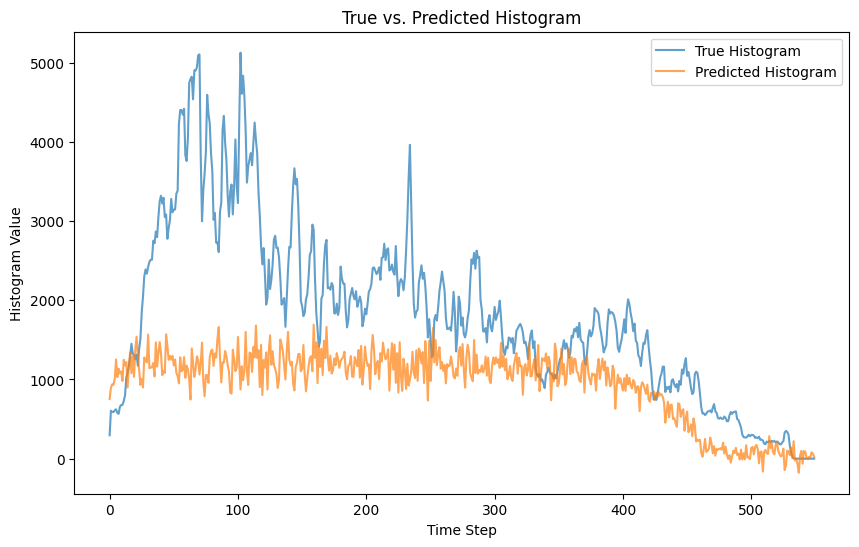

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - loss: 2753948.0000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - loss: 2511284.7500
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - loss: 2286295.5000
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - loss: 2079540.2500
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - loss: 1891309.0000
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 1721649.6250
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - loss: 1570329.5000
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 1436828.6250
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 1320373.0000
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - loss: 1220012.5000
Test MSE for this fold: 605879.8125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Test RMSE for this fold: 778.3828735351562


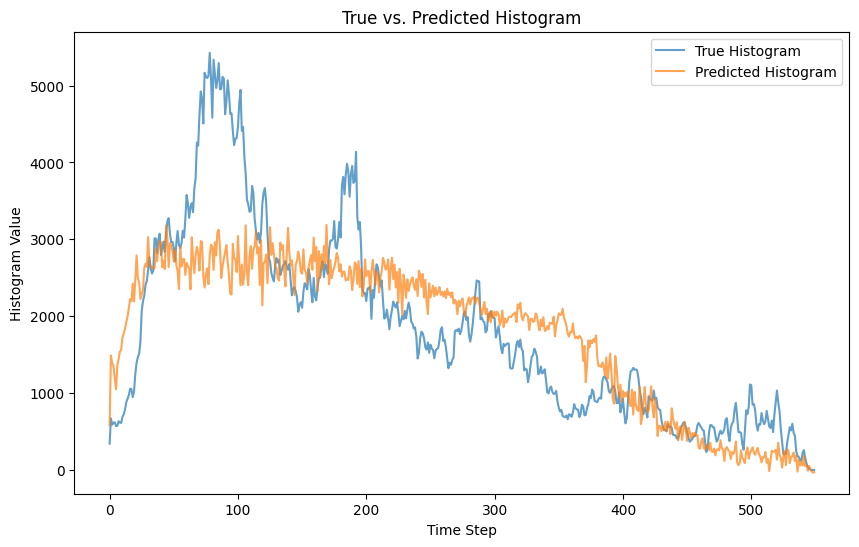

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 1124226.3750
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - loss: 1050763.0000
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - loss: 989061.5000
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 937820.7500
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 895654.1250
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 861164.6250
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - loss: 833006.1250
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - loss: 809899.7500
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - loss: 790682.6250
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - loss: 774340.6250
Test MSE for this fold: 1101703.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Test RMSE for this fold: 1049.620361328125


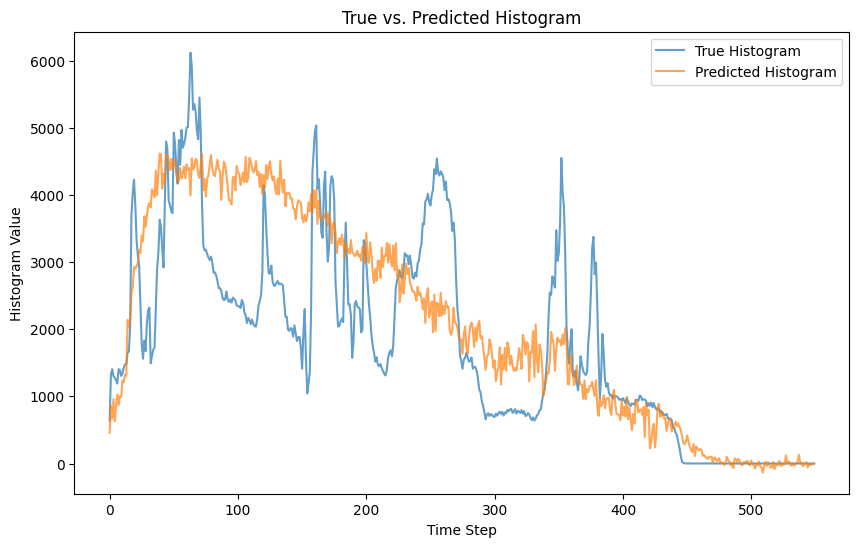

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - loss: 754874.4375
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - loss: 746353.8750
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - loss: 737495.3125
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - loss: 727872.5000
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - loss: 717332.3750
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step - loss: 705923.3125
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - loss: 693825.4375
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - loss: 681280.3750
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - loss: 668568.6250
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - loss: 655969.2500
Test MSE for this fold: 872922.9375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Test RMSE for this fold: 934.303466796875


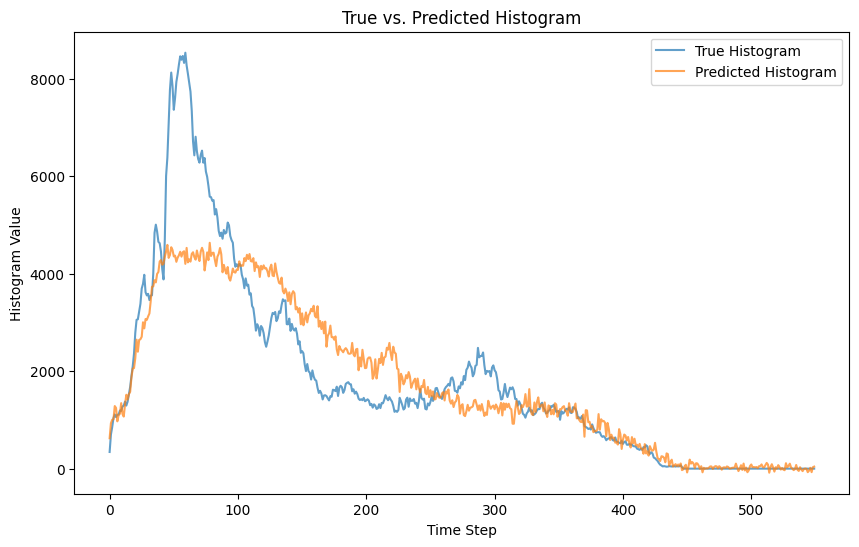

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - loss: 679628.1875
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 668120.3125
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 657381.8125
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - loss: 647416.8125
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 638171.7500
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 629555.8125
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 621447.1875
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - loss: 613745.3125
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - loss: 606337.0625
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - loss: 599100.8125
Test MSE for this fold: 144660.09375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Test RMSE for this fold: 380.3420715332031


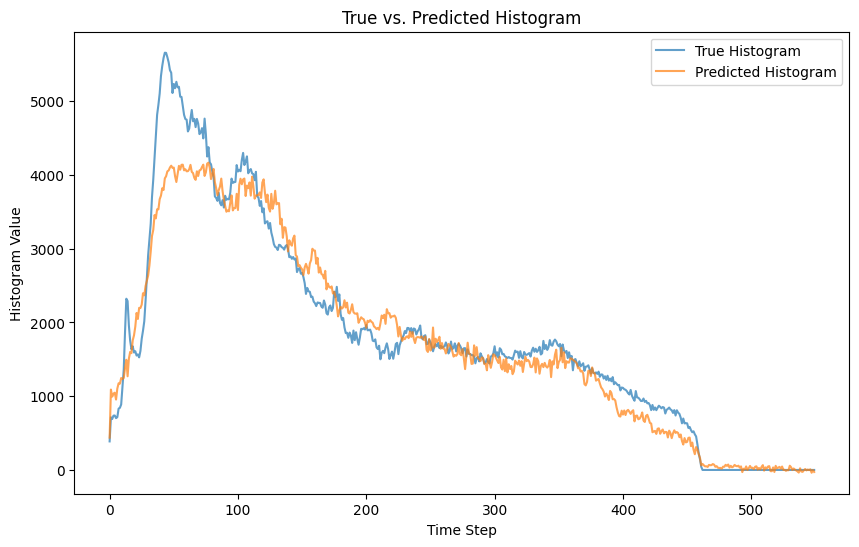

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - loss: 582932.8125
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - loss: 575971.0625
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 568966.3125
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 561888.2500
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - loss: 554736.5000
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - loss: 547506.6250
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 540215.8125
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - loss: 532868.1875
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - loss: 525477.3125
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 518041.1562
Test MSE for this fold: 321277.53125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Test RMSE for this fold: 566.8134765625


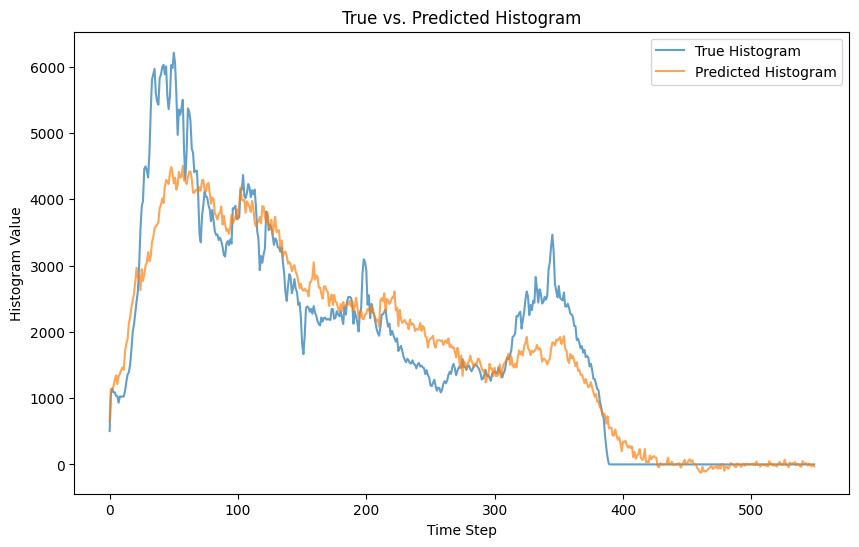

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - loss: 518487.2500
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - loss: 510723.7812
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 502816.6250
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - loss: 494798.5938
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - loss: 486701.0625
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 478536.0625
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step - loss: 470317.6875
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step - loss: 462045.0625
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step - loss: 453712.2500
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step - loss: 445305.4062
Test MSE for this fold: 178968.390625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Test RMSE for this fold: 423.04656982421875


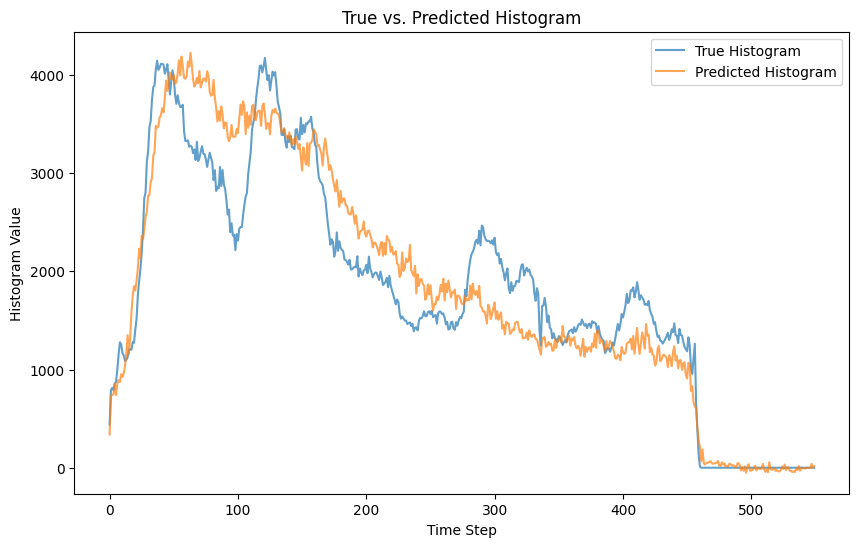

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - loss: 393583.1875
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - loss: 385722.6250
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step - loss: 377593.0938
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - loss: 369331.5625
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 361026.4375
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - loss: 352752.7812
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - loss: 344561.0000
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - loss: 336477.0312
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - loss: 328485.9688
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - loss: 320559.4375
Test MSE for this fold: 968982.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Test RMSE for this fold: 984.3688354492188


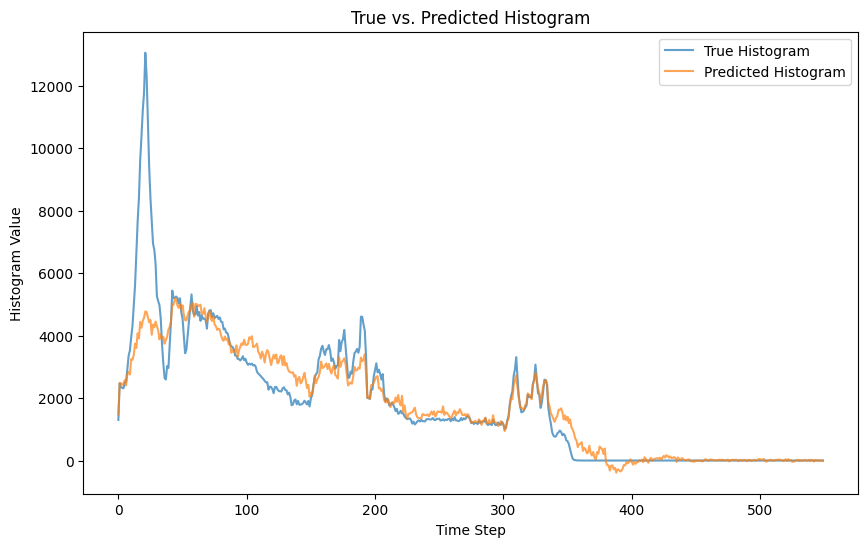

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 356390.7812
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - loss: 348124.2500
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - loss: 339261.6562
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - loss: 329907.1250
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 320210.1875
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 310342.0312
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - loss: 300465.2812
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - loss: 290697.9062
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - loss: 281104.7812
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - loss: 271716.5625
Test MSE for this fold: 141625.828125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Test RMSE for this fold: 376.33209228515625


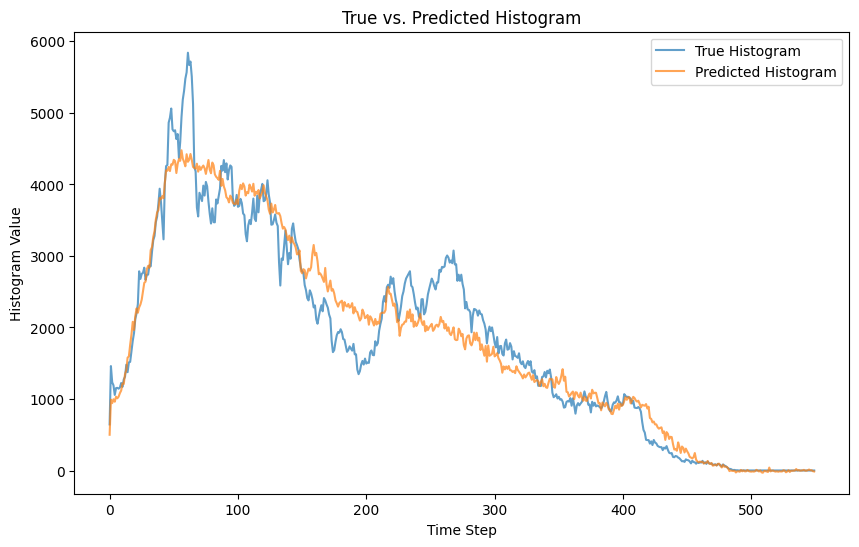

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 216754.8594
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - loss: 209353.3906
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 201795.0938
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 194247.5625
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss: 186851.0469
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - loss: 179719.1250
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - loss: 172921.1562
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - loss: 166441.2344
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 160202.9375
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 154120.0781
Test MSE for this fold: 878553.6875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Test RMSE for this fold: 937.3119506835938


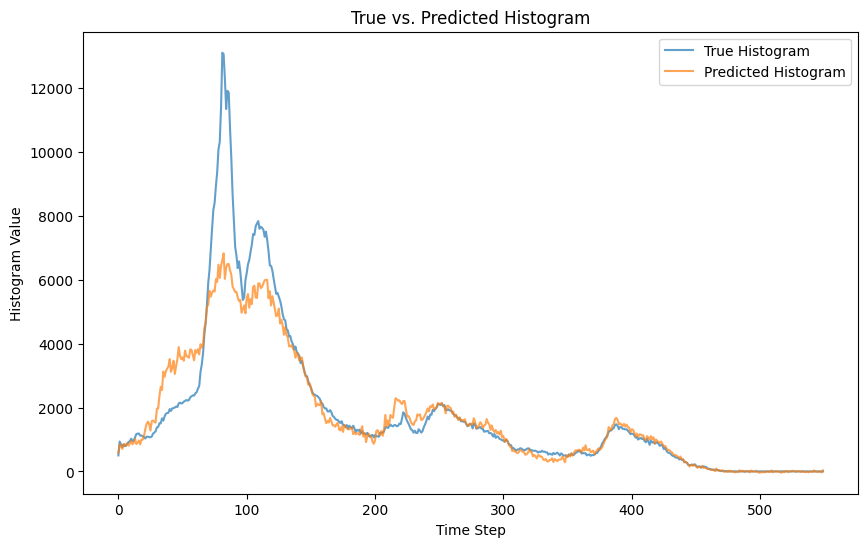

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 181888.1094
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - loss: 175288.9688
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - loss: 168418.9688
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - loss: 161552.7500
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step - loss: 154895.7812
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step - loss: 148613.0625
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - loss: 142779.9531
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - loss: 137359.3438
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - loss: 132243.2031
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step - loss: 127278.8438
Test MSE for this fold: 174471.4375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Test RMSE for this fold: 417.69781494140625


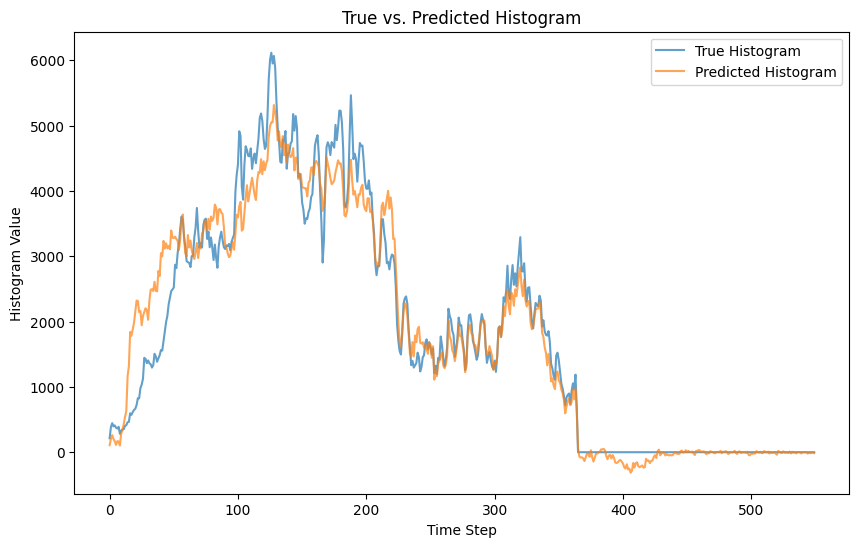

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - loss: 127057.8125
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step - loss: 122095.8828
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 117218.1953
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - loss: 112602.6719
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - loss: 108249.6484
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - loss: 104053.0625
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - loss: 99968.6094
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 96014.1328
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - loss: 92246.5938
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - loss: 88671.2344
Test MSE for this fold: 74599.6640625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Test RMSE for this fold: 273.1293640136719


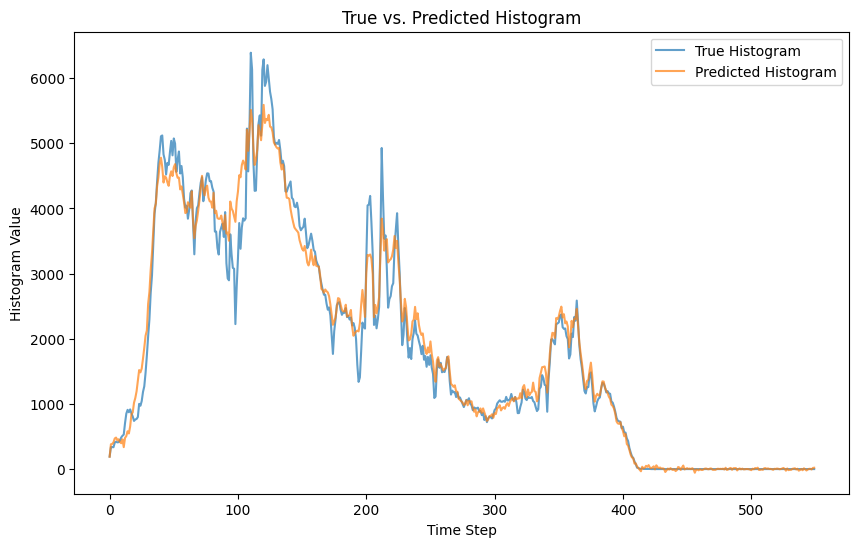

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - loss: 87231.5547
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - loss: 83755.1094
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - loss: 80475.5625
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - loss: 77382.2734
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 74375.0000
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 71401.2500
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - loss: 68501.9219
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - loss: 65723.5469
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - loss: 63076.6836
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 60553.0312
Test MSE for this fold: 41326.65234375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Test RMSE for this fold: 203.28958129882812


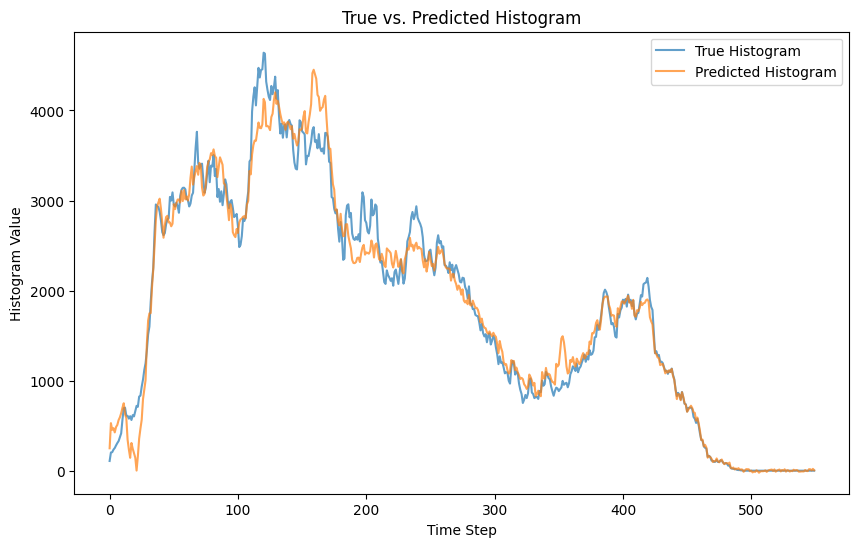

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - loss: 58224.3750
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - loss: 55795.0859
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 53495.4023
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 51372.0391
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - loss: 49308.9258
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - loss: 47263.7344
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - loss: 45299.6211
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - loss: 43439.2188
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - loss: 41664.4219
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 39974.8086
Test MSE for this fold: 49801.38671875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Test RMSE for this fold: 223.1622314453125


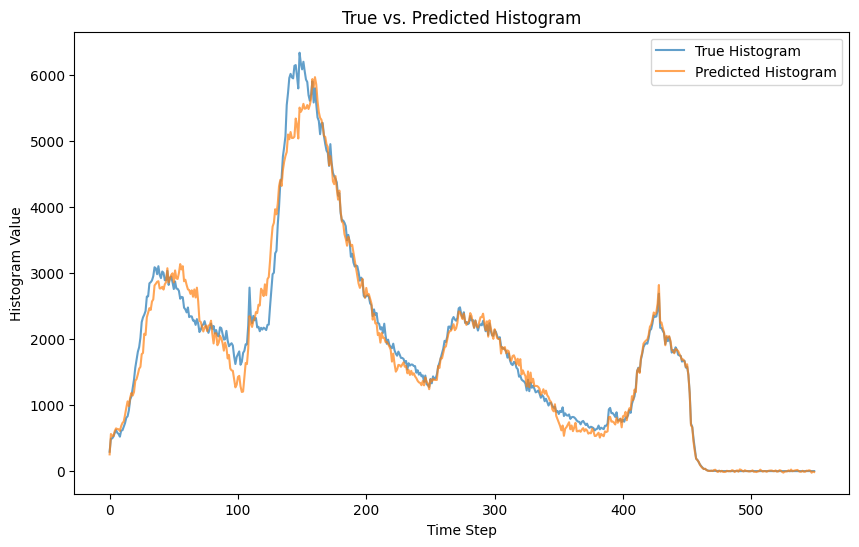

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - loss: 39676.8555
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step - loss: 38137.2656
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step - loss: 36717.2344
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step - loss: 35436.2148
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step - loss: 34148.2891
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - loss: 32814.5625
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step - loss: 31520.9961
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - loss: 30332.2500
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - loss: 29195.1191
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - loss: 28058.8184
Test MSE for this fold: 26852.927734375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Test RMSE for this fold: 163.86863708496094


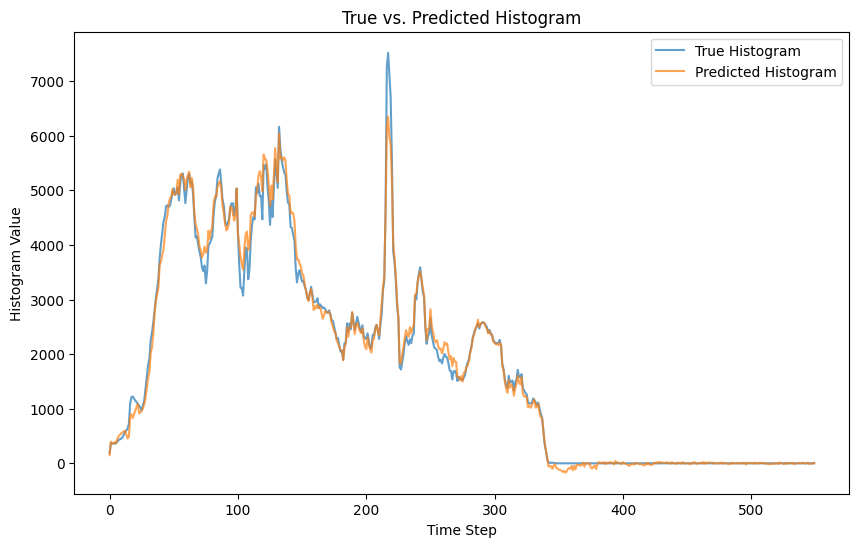

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 26426.3047
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - loss: 25398.7734
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - loss: 24451.5469
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - loss: 23545.2246
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - loss: 22673.4609
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - loss: 21811.9336
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - loss: 20966.3496
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - loss: 20169.6973
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 19422.6172
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - loss: 18698.0098
Test MSE for this fold: 37372.56640625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Test RMSE for this fold: 193.31985473632812


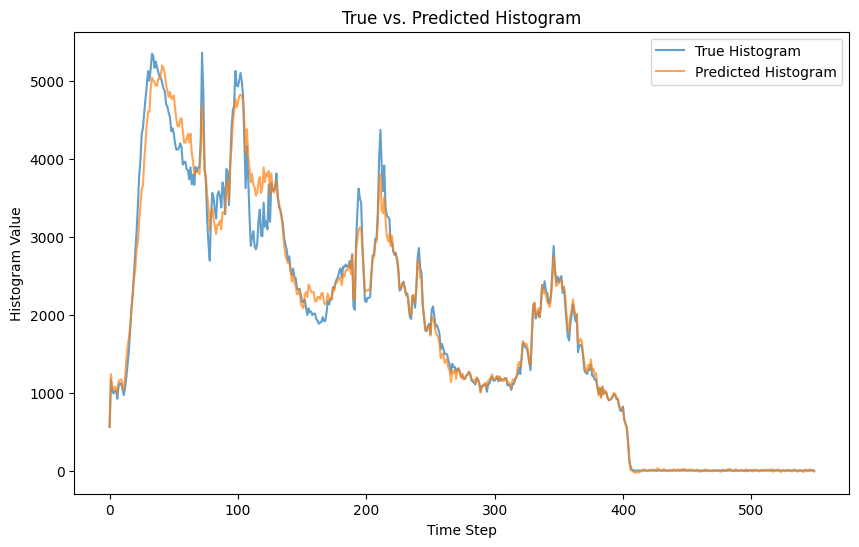

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 19442.5449
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - loss: 18733.5332
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - loss: 18063.0977
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - loss: 17456.2246
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step - loss: 16837.6777
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 16216.9180
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 15617.1396
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 15052.1875
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - loss: 14500.8008
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - loss: 13957.1562
Test MSE for this fold: 10311.443359375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Test RMSE for this fold: 101.54528045654297


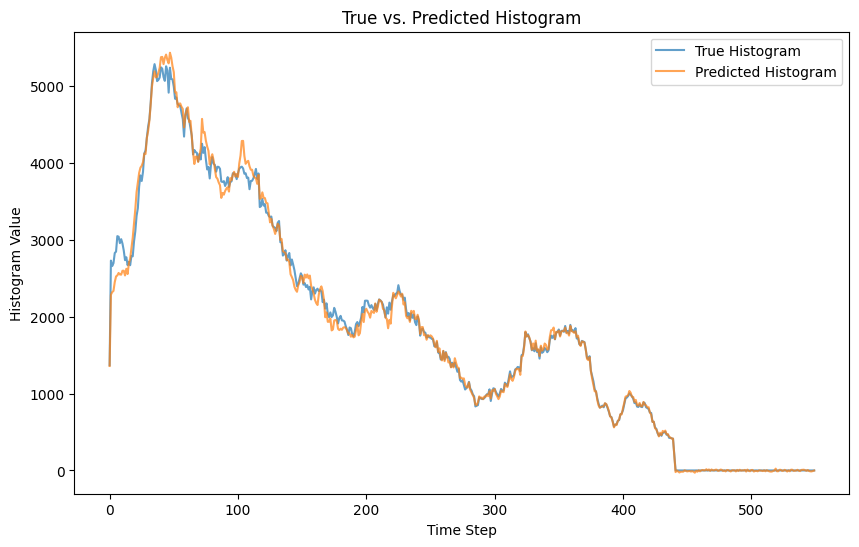

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - loss: 13393.1123
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - loss: 12885.3291
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - loss: 12460.1758
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - loss: 12014.6875
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 11586.5391
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - loss: 11165.2119
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - loss: 10774.7637
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step - loss: 10394.2305
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step - loss: 10014.8477
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - loss: 9663.9990
Test MSE for this fold: 11186.109375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Test RMSE for this fold: 105.764404296875


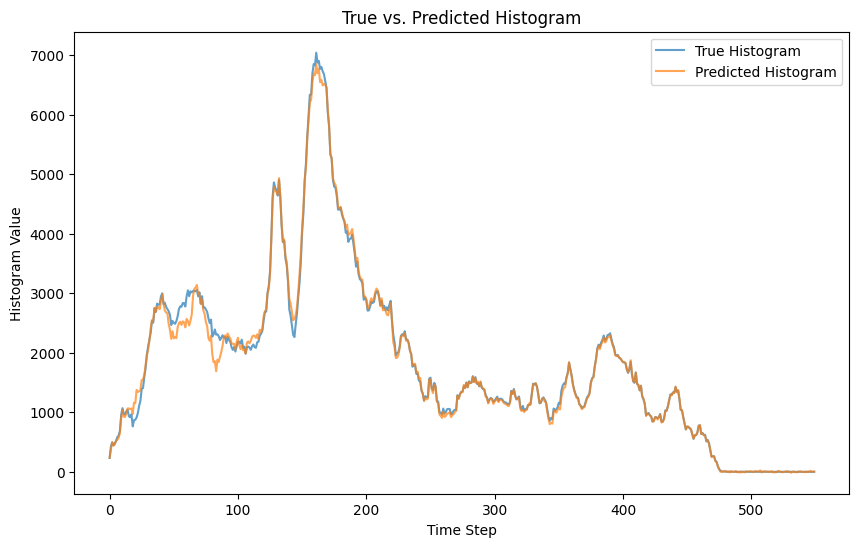

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - loss: 9587.1973
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - loss: 9224.9209
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - loss: 8911.6416
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - loss: 8624.5127
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step - loss: 8327.9209
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - loss: 8023.7847
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - loss: 7735.5854
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - loss: 7457.4004
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - loss: 7188.3857
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - loss: 6931.6284
Test MSE for this fold: 7368.0693359375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Test RMSE for this fold: 85.83746337890625


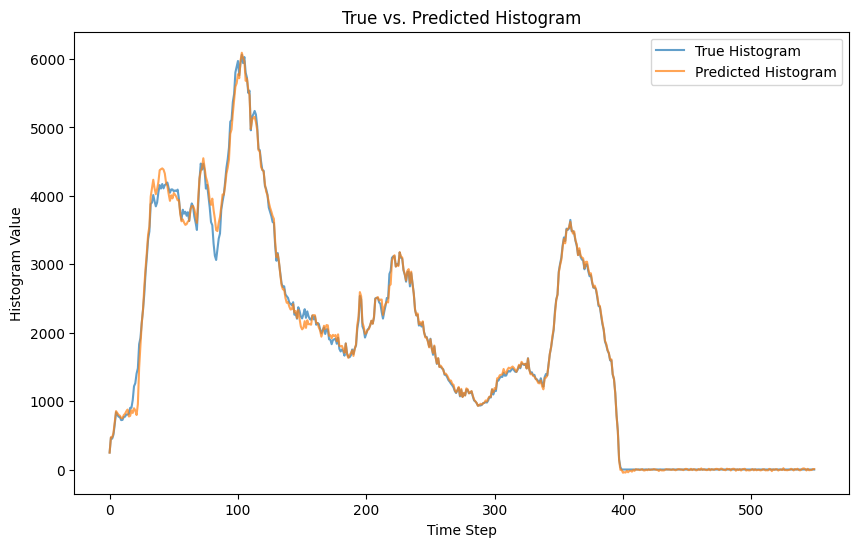

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - loss: 6077.7910
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - loss: 5834.0820
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 5637.3359
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - loss: 5451.2734
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - loss: 5254.0698
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - loss: 5062.5508
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - loss: 4881.1748
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - loss: 4709.9048
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 4539.2759
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - loss: 4377.9062
Test MSE for this fold: 19763.544921875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Test RMSE for this fold: 140.58287048339844


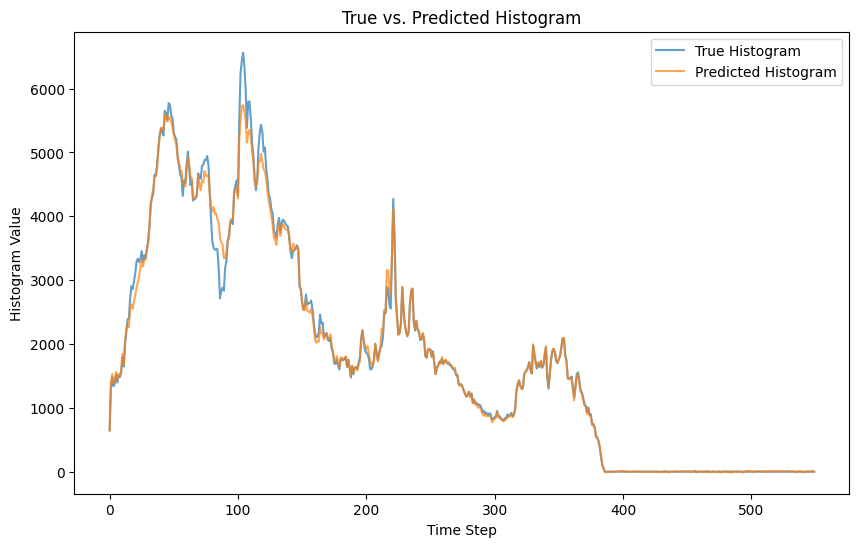


--- Final Validation ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Song 1 - Final Validation RMSE: 44.21648025512695


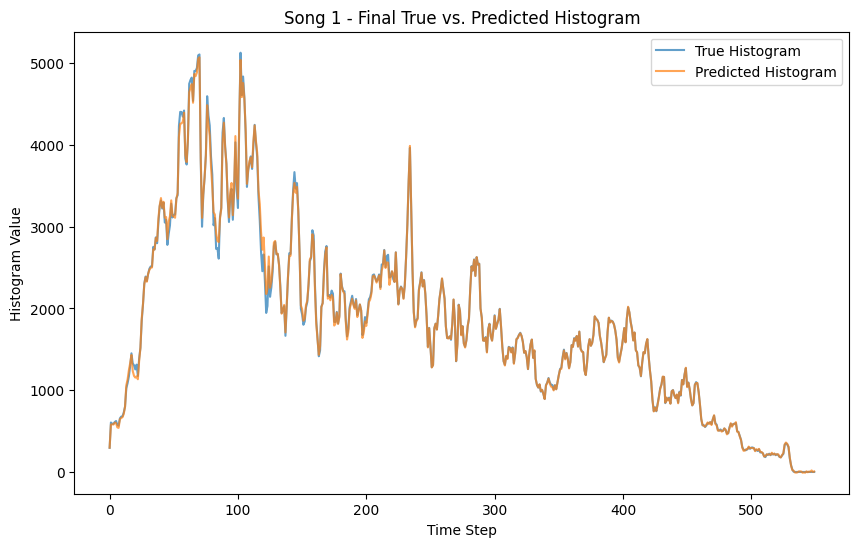

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Song 2 - Final Validation RMSE: 25.29935073852539


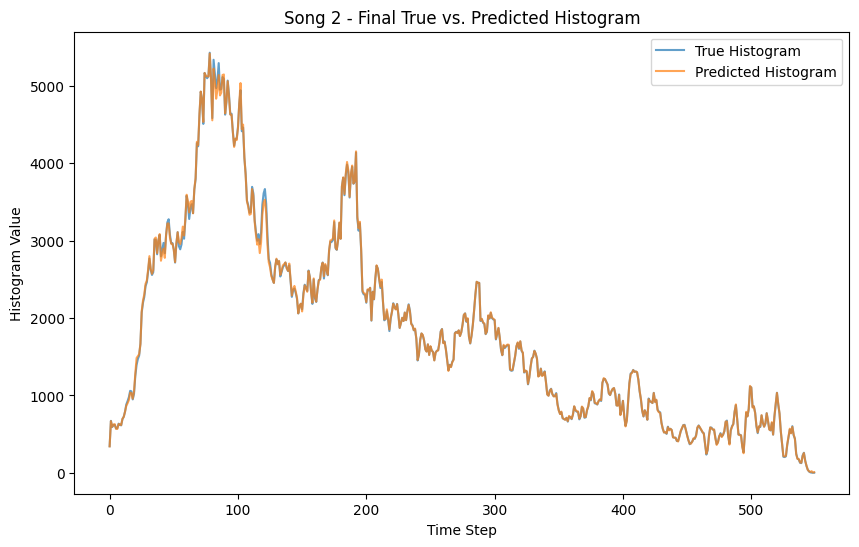

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Song 3 - Final Validation RMSE: 29.634319305419922


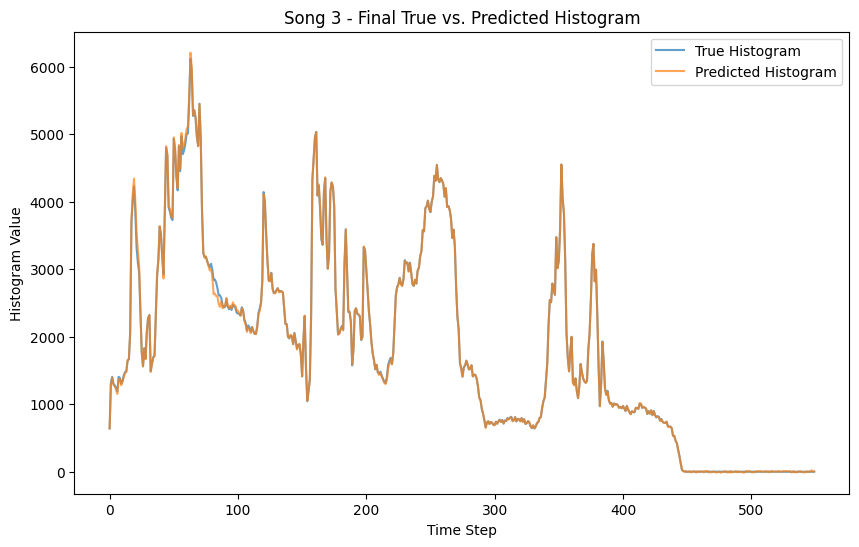

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Song 4 - Final Validation RMSE: 61.878631591796875


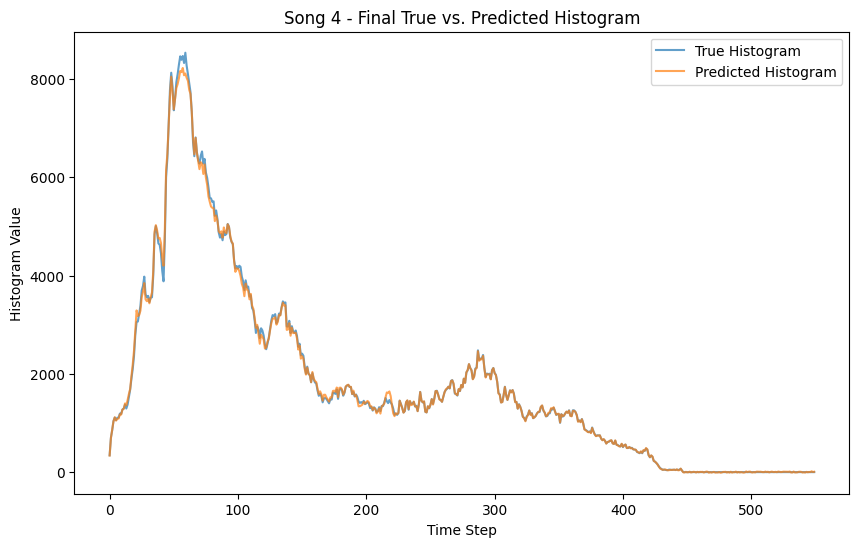

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Song 5 - Final Validation RMSE: 127.77674865722656


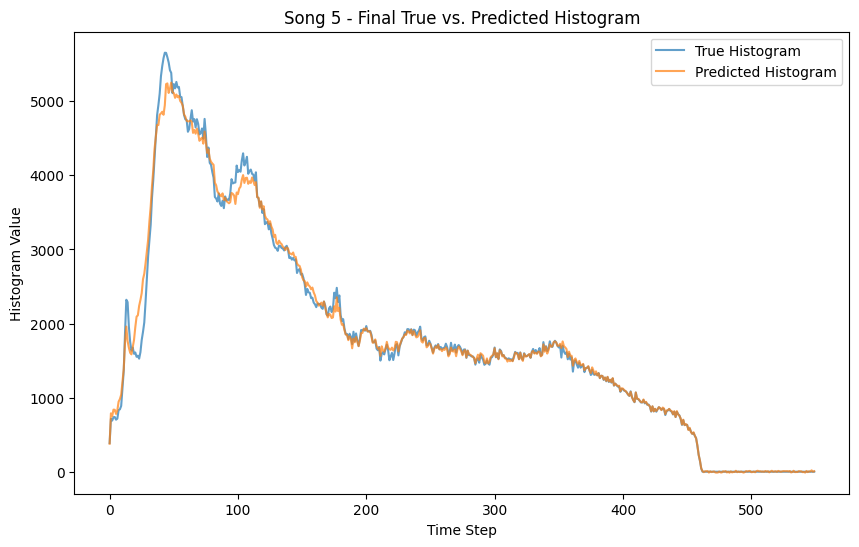

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Song 6 - Final Validation RMSE: 103.24773406982422


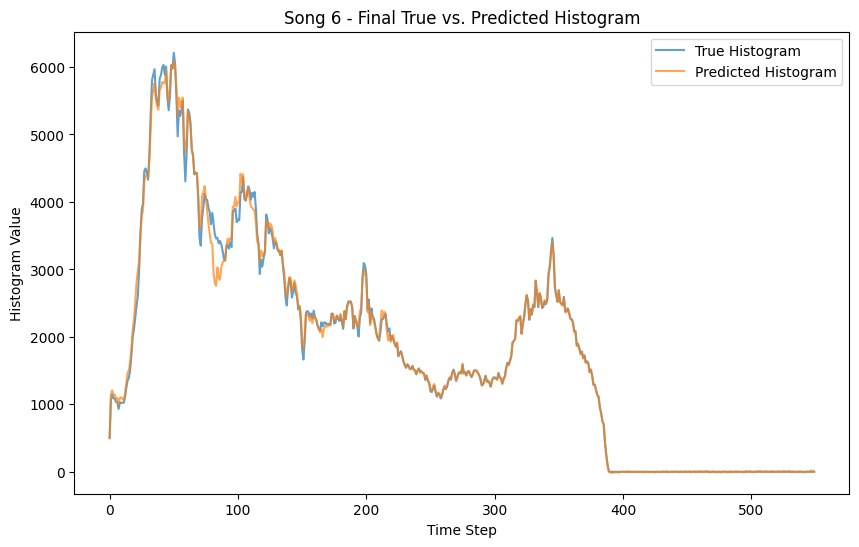

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Song 7 - Final Validation RMSE: 73.57998657226562


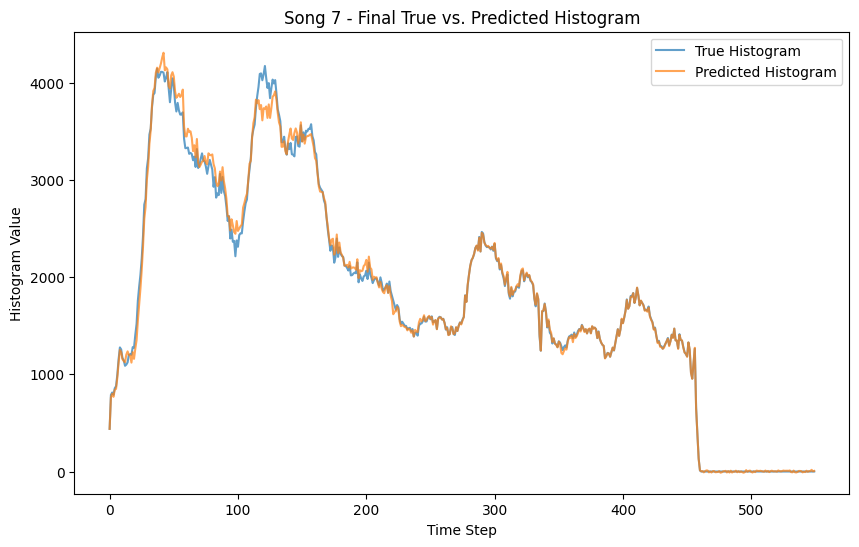

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Song 8 - Final Validation RMSE: 39.502647399902344


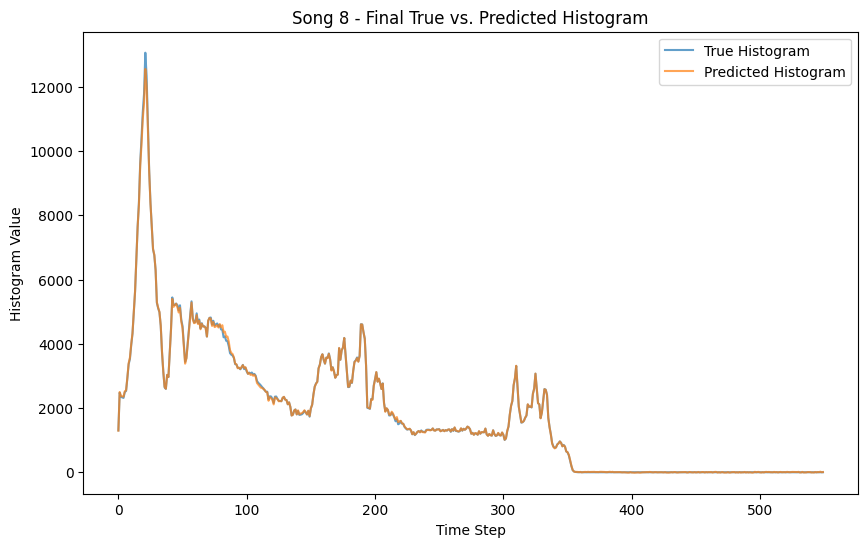

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Song 9 - Final Validation RMSE: 66.62040710449219


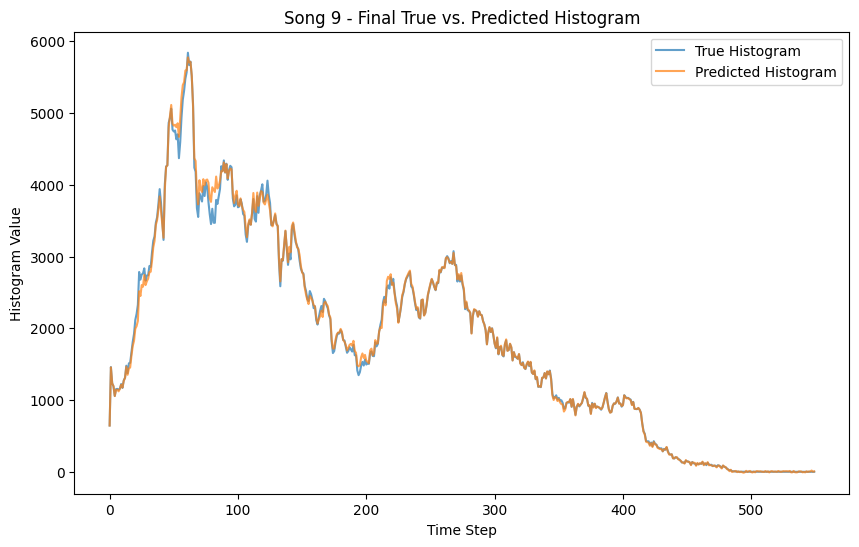

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Song 10 - Final Validation RMSE: 25.716629028320312


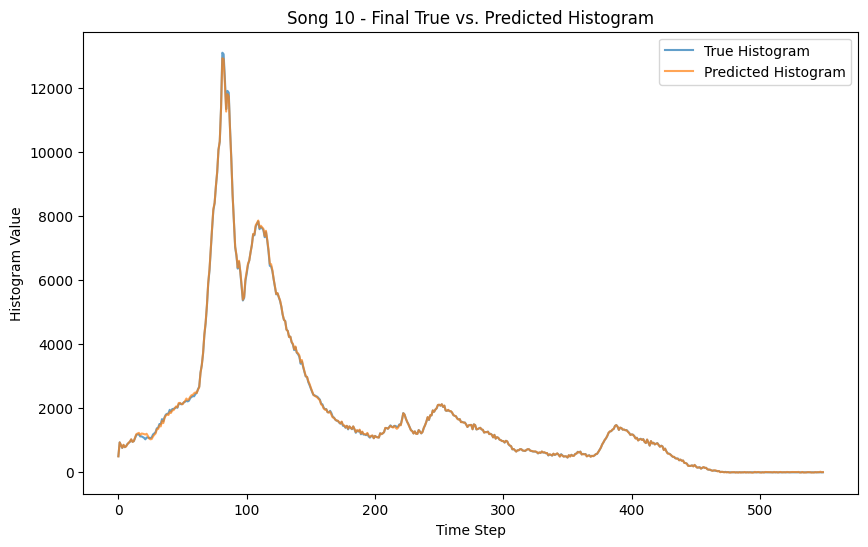

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Song 11 - Final Validation RMSE: 55.00053405761719


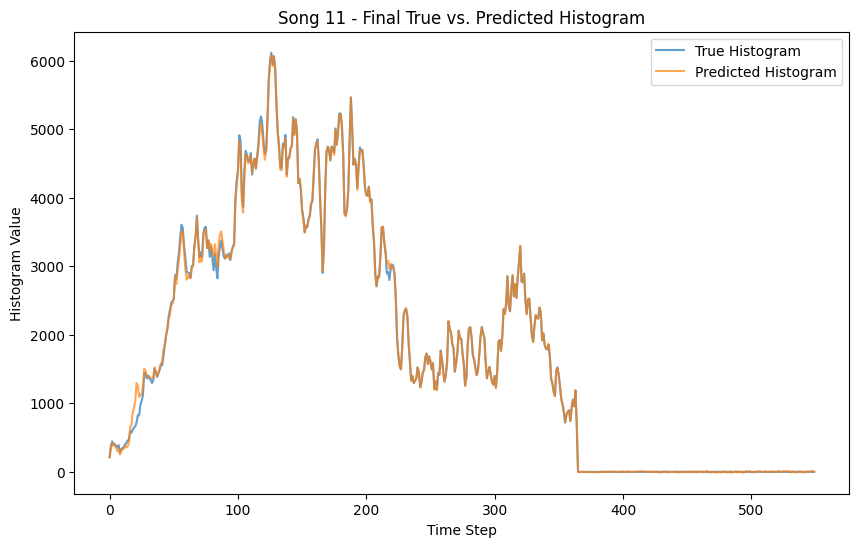

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Song 12 - Final Validation RMSE: 46.924278259277344


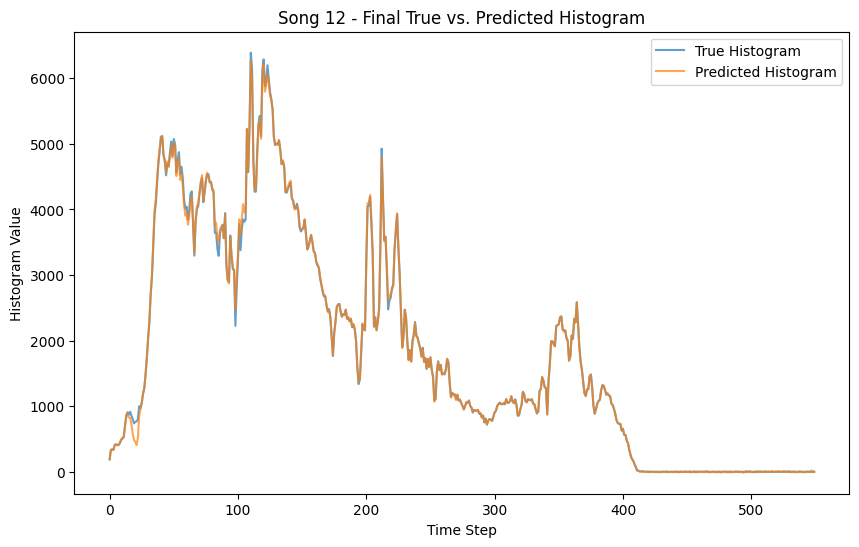

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Song 13 - Final Validation RMSE: 67.07569885253906


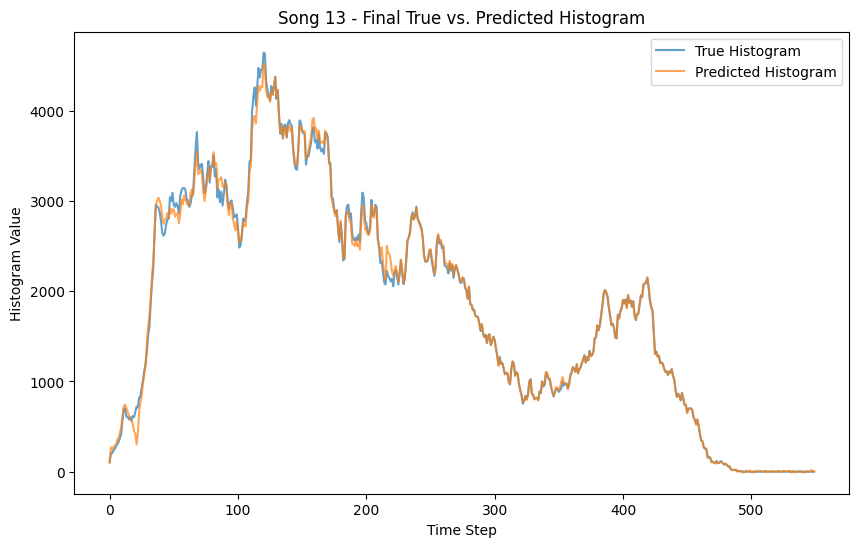

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Song 14 - Final Validation RMSE: 53.15948486328125


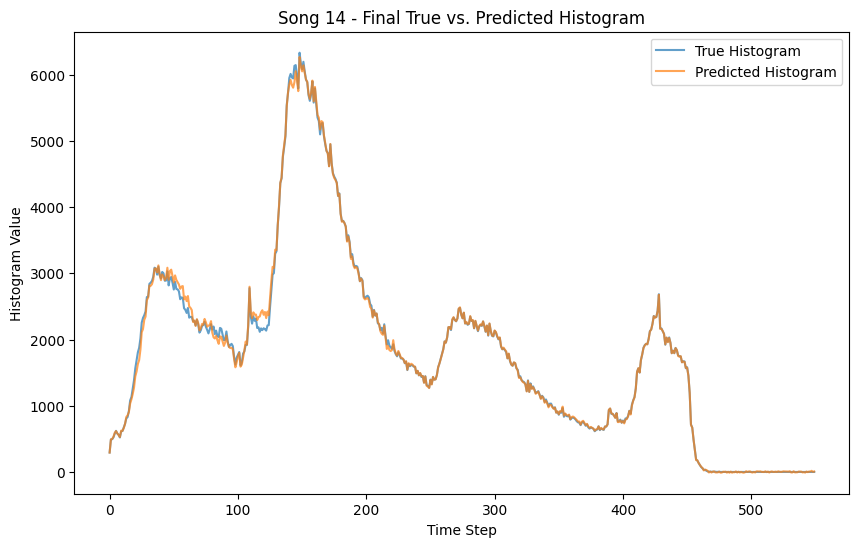

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Song 15 - Final Validation RMSE: 40.244110107421875


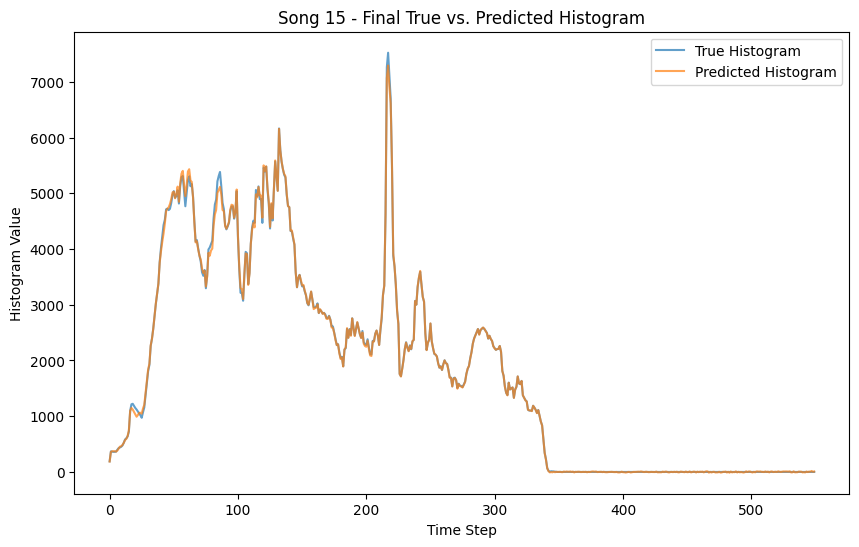

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Song 16 - Final Validation RMSE: 82.20928955078125


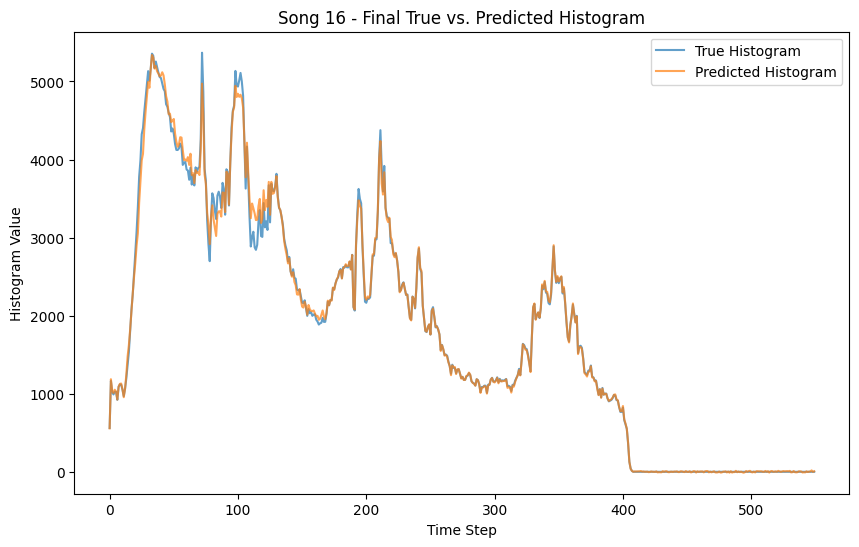

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Song 17 - Final Validation RMSE: 58.39400863647461


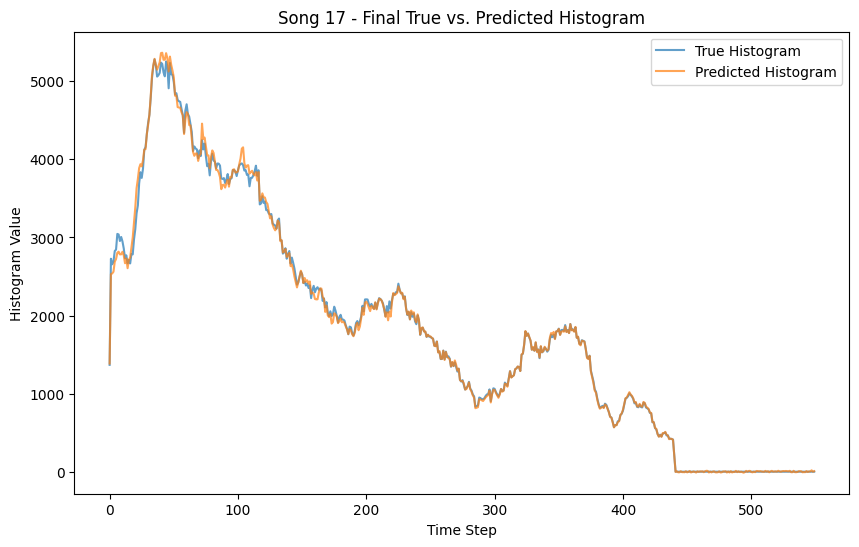

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Song 18 - Final Validation RMSE: 55.638519287109375


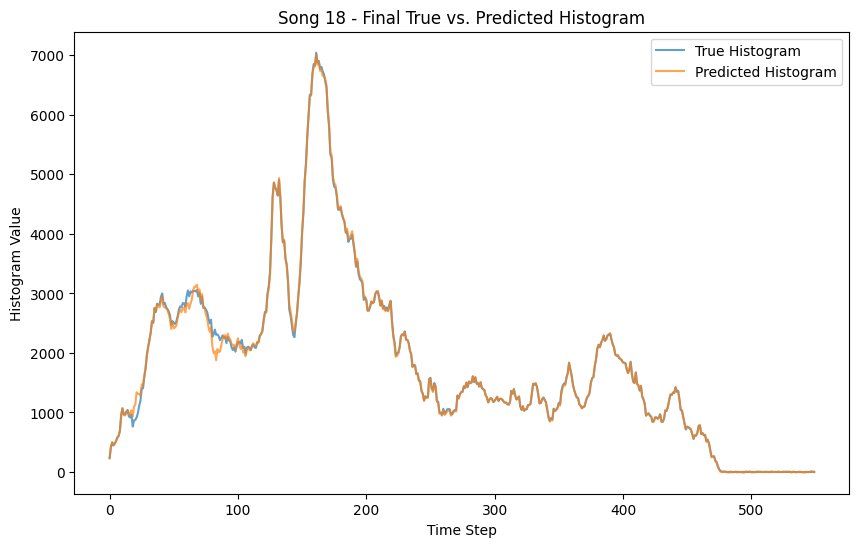

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Song 19 - Final Validation RMSE: 80.81524658203125


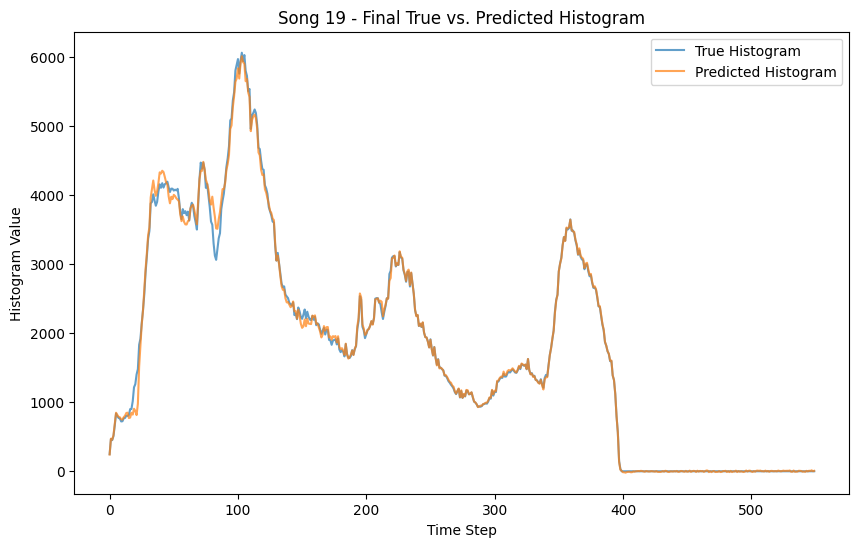

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Song 20 - Final Validation RMSE: 140.58287048339844


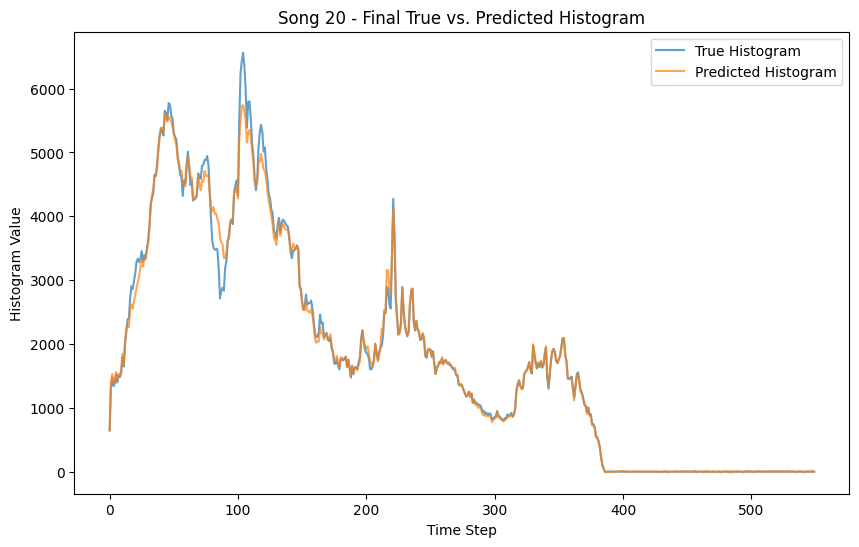

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Initialize Leave-One-Out cross-validator
loo = LeaveOneOut()

# Create the model outside the loop to reuse it
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(550, 14)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(550, activation='linear'))  # 550 since we have 550 as a max for the mfcc data.
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Loop through each song for LOO CV and continue training
for train_index, test_index in loo.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fine-tune the model using the new training data
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)  # Use fewer epochs for incremental training

    # Evaluate the model on the test set
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test MSE for this fold: {loss}")

    # Make predictions
    y_pred = model.predict(X_test).flatten()

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test.flatten(), y_pred))
    print(f"Test RMSE for this fold: {rmse}")

    # Plot the true vs. predicted histograms
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.flatten(), label='True Histogram', alpha=0.7)
    plt.plot(y_pred, label='Predicted Histogram', alpha=0.7)
    plt.xlabel('Time Step')
    plt.ylabel('Histogram Value')
    plt.title('True vs. Predicted Histogram')
    plt.legend()
    plt.show()

# Final Validation: Evaluate the model on all songs
print("\n--- Final Validation ---")
for i in range(len(X)):
    y_pred_final = model.predict(np.expand_dims(X[i], axis=0)).flatten() #Need to add 1 to make it 1, 550, 14 again
    rmse_final = np.sqrt(mean_squared_error(y[i].flatten(), y_pred_final))

    print(f"Song {i+1} - Final Validation RMSE: {rmse_final}")

    # Plot the final true vs. predicted histograms
    plt.figure(figsize=(10, 6))
    plt.plot(y[i].flatten(), label='True Histogram', alpha=0.7)
    plt.plot(y_pred_final, label='Predicted Histogram', alpha=0.7)
    plt.xlabel('Time Step')
    plt.ylabel('Histogram Value')
    plt.title(f'Song {i+1} - Final True vs. Predicted Histogram')
    plt.legend()
    plt.show()
